# Will John play tennis?

In this first example we will use the example from the video and try to predict if John will play tennis on a particular day? We will use **scikit-learn** to build the decision tree. We will visualize the tree using Pydotplus and Graphviz. Graphviz is a tool for drawing graphics using dot files. Pydotplus is a module to Graphviz’s Dot language.

First install Graphviz and Pydotplus:

1. Download Graphviz and Install https://graphviz.gitlab.io/_pages/Download/Download_windows.html


2. !pip install graphviz<br>
   !pip install pydotplus


3. Add the graphviz installed path (C:...\graphviz\bin) to Control Panel > System and Security > System > Advanced System Settings > Environment Variables > Path > Edit > New


4. Very Important: Restart your Jupyter Notebook/machine.

In [40]:
!pip install graphviz
!pip install pydotplus


## 1. Import packages and classes

The first step is to import the packages:

In [41]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [42]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


## 2. Provide the data

The second step is defining the data to work with. Below you will find the data from the example in Excel-format. We will load the data, build the tree and at the end, we will try to predict if John will play tennis on a rainy day with high humidity and weak wind.

<img src="./resources/tennis.png" style="height: 300px"/>

Let's import the data using pandas:

In [43]:
# load dataset
tennis_df = pd.read_csv("resources/tennis1.csv", sep=';')

We can then print the imported values:

In [44]:
print(tennis_df)

    day   outlook humidity    wind play
0    d1     sunny     high    weak   no
1    d2     sunny     high  strong   no
2    d3  overcast     high    weak  yes
3    d4      rain     high    weak  yes
4    d5      rain   normal    weak  yes
5    d6      rain   normal  strong   no
6    d7  overcast   normal  strong  yes
7    d8     sunny     high    weak   no
8    d9     sunny   normal    weak  yes
9   d10      rain   normal    weak  yes
10  d11     sunny   normal  strong  yes
11  d12  overcast     high  strong  yes
12  d13  overcast   normal    weak  yes
13  d14      rain     high  strong   no


And we can even do a very small EDA, using the power of pandas (a little overkill for this toy example dataset):

In [45]:
tennis_df.describe()

,day,outlook,humidity,wind,play
count,14,14,14,14,14
unique,14,3,2,2,2
top,d1,sunny,high,weak,yes
freq,1,5,7,8,9


## 3. Split the data

Given input features: *outlook, humidity and wind* we will predict if John will *play* or not. Let's split the features and the target variable:

In [46]:
# split dataset in features and target variable

feature_cols = ['outlook', 'humidity', 'wind']

X = tennis_df[feature_cols]
y = tennis_df[['play']] # target variable

In [47]:
print(X)

     outlook humidity    wind
0      sunny     high    weak
1      sunny     high  strong
2   overcast     high    weak
3       rain     high    weak
4       rain   normal    weak
5       rain   normal  strong
6   overcast   normal  strong
7      sunny     high    weak
8      sunny   normal    weak
9       rain   normal    weak
10     sunny   normal  strong
11  overcast     high  strong
12  overcast   normal    weak
13      rain     high  strong


In [48]:
print(y)

   play
0    no
1    no
2   yes
3   yes
4   yes
5    no
6   yes
7    no
8   yes
9   yes
10  yes
11  yes
12  yes
13   no


## 4. Train the classifier

The next step is to train the classifier (decision tree) with the data. As you know, training is always necessary for supervised learning algorithms.

In [50]:
clf = DecisionTreeClassifier()
clf = clf.fit(X, y)

ValueError: could not convert string to float: 'sunny'

When you run the code above, you should get the following error:

```
ValueError: could not convert string to float: 'sunny'
```

**The decision trees implemented in scikit-learn use only numerical features and these features are interpreted always as continuous numeric variables. *sunny, overcast and rain* are categorical features and they are not supported in scikit-learn.**

The simpliest way to solve this, is to replace our categorical string values with numerical values. But, simply replacing the strings with numbers normally should be avoided. Because being considered as a continuous numerical feature, any coding you  use, will induce an order which simply does not exist in your data.

For example coding ['sunny', 'overcast', 'rain'] with [1, 2, 3], would produce weird things like 'sunny' is lower than 'overcast', and if you average a 'sunny' and a 'rain' you will get a 'overcast'.

But, since it is the simpliest solution, and we're dealing with a toy dataset, we are going to do it anyway. You can always search the internet for better encoding solutions. **Hint: one hot encoding!** But, here, in this case, one hot encoding will create more features, more dimensions, and thus a more sparse matrix. And since a decision tree will look for the best splitter by going over all features and all posible values of those features (to determine the highest information gain), it will induce a higher computational cost. Yet, it might still be acceptable because this is a very simple toy dataset, so one hot encoding would be fine.

So let's install `category_encoders` to replace the categories with numeric values. The category_encoders library, which work with pandas, is an extension on the scikit-learn library, which works with numpy arrays. Since pandas recently underwent a renewal, you might get a future warning, when using category_encoders, since it's build on the previous version of pandas. Let's just hope, that a newer version of the category_encoders will be published soon!

In [51]:
pip install --upgrade category_encoders

Note: you may need to restart the kernel to use updated packages.


In [52]:
print(X)

     outlook humidity    wind
0      sunny     high    weak
1      sunny     high  strong
2   overcast     high    weak
3       rain     high    weak
4       rain   normal    weak
5       rain   normal  strong
6   overcast   normal  strong
7      sunny     high    weak
8      sunny   normal    weak
9       rain   normal    weak
10     sunny   normal  strong
11  overcast     high  strong
12  overcast   normal    weak
13      rain     high  strong


In [53]:
print(feature_cols)

['outlook', 'humidity', 'wind']


In [54]:
import category_encoders as ce

ce_ord = ce.OrdinalEncoder(cols = feature_cols)
X_cat = ce_ord.fit_transform(X)

# or if you want to try the one hot encoding 
ce_oh = ce.OneHotEncoder(cols = feature_cols)
X_cat_oh = ce_oh.fit_transform(X)

/Users/charlesnanakwakye/AI Project/Lessons/ML_env/lib/python3.11/site-packages/category_encoders/utils.py:28: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(cols):
/Users/charlesnanakwakye/AI Project/Lessons/ML_env/lib/python3.11/site-packages/category_encoders/utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
/Users/charlesnanakwakye/AI Project/Lessons/ML_env/lib/python3.11/site-packages/category_encoders/utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
/Users/charlesnanakwakye/AI Project/Lessons/ML_env/lib/python3.11/site-packages/category_encoders/util

In [55]:
print(X_cat)

    outlook  humidity  wind
0         1         1     1
1         1         1     2
2         2         1     1
3         3         1     1
4         3         2     1
5         3         2     2
6         2         2     2
7         1         1     1
8         1         2     1
9         3         2     1
10        1         2     2
11        2         1     2
12        2         2     1
13        3         1     2


In [56]:
print(X_cat_oh)
# notice the outlook feature was split into 3 columns, the humidity and wind into 2

    outlook_1  outlook_2  outlook_3  humidity_1  humidity_2  wind_1  wind_2
0           1          0          0           1           0       1       0
1           1          0          0           1           0       0       1
2           0          1          0           1           0       1       0
3           0          0          1           1           0       1       0
4           0          0          1           0           1       1       0
5           0          0          1           0           1       0       1
6           0          1          0           0           1       0       1
7           1          0          0           1           0       1       0
8           1          0          0           0           1       1       0
9           0          0          1           0           1       1       0
10          1          0          0           0           1       0       1
11          0          1          0           1           0       0       1
12          

Now we can try to train the classifier (decision tree) with the data.

In [57]:
clf = DecisionTreeClassifier(criterion = "entropy")
clf = clf.fit(X_cat, y)
# don't create the one hot encoded model just yet, otherwise the graphviz below will not work

## 5. Visualize the decision tree

Now we can use the packages from above (graphviz and pydotplus) to visualize our decision tree.

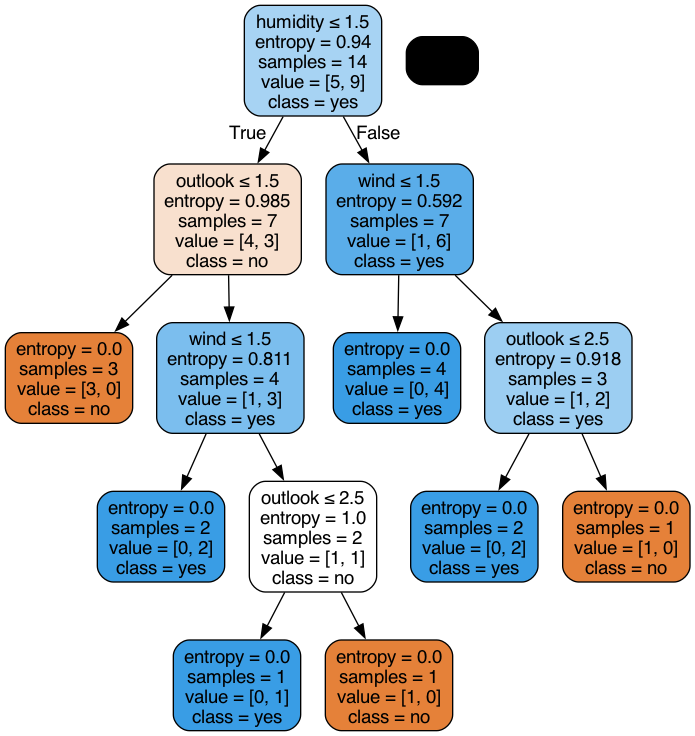

In [58]:
from io import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, filled = True, rounded = True,
                special_characters = True, feature_names = feature_cols, class_names=['no','yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png(), width = 550)

Remarks:
    
- The algorithm keeps generating levels until the datasets are pure (entropy = 0).
- Since scikit-learn works with continuous values, the conditions in the nodes are formulated as `feature <= some_other_value` with only two outcomes (true or false). In our example we had categorical values: *Outlook is sunny, overcast or rain*.

## 6. Make predictions - Exercise

We wanted to predict if John would play tennis on a rainy day with high humidity and weak wind. Can you first convert the features in number values and use the tree above to determine if John will play tennis?

In [ ]:
# answer?
# [outlook, humidity, wind] = [ , , ]
# Will John play tennis? YES / NO

You can check yourself if your prediction was right.

In [ ]:
prediction = clf.predict([[3, 1, 1]])                                         
print(prediction)  

['yes']


c:\Users\u0040810\OneDrive - Thomas More\AI Project\2023_2024\ML_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


And, now, if we wanted to use the one hot encoded data to model our data:

In [ ]:
clf = DecisionTreeClassifier(criterion = "entropy")
clf_oh = clf.fit(X_cat_oh, y)

And let's do the same prediction, but now in a one hot encoded way:

In [ ]:
prediction = clf_oh.predict([[0, 0, 1, 1, 0, 1, 0]])    # now we have to encode it the same way                                     
print(prediction)  

['yes']


c:\Users\u0040810\OneDrive - Thomas More\AI Project\2023_2024\ML_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## 7. An extra feature temperature - Exercise

In the resources you will find a file tennis2.csv with an extra feature. Can you use this file and predict if John will still  play tennis on a HOT rainy day with high humidity and weak wind?

In [ ]:
# load dataset


In [ ]:
# print dataset


In [ ]:
# split dataset in features and target variable


In [ ]:
# encode the categories


In [ ]:
# print the encoded categories


In [ ]:
# fit the classifier


In [ ]:
# print the decision tree


In [ ]:
# make prediction
 

In [ ]:
# Will John still play tennis on a HOT rainy day with high humidity and weak wind?
# answer